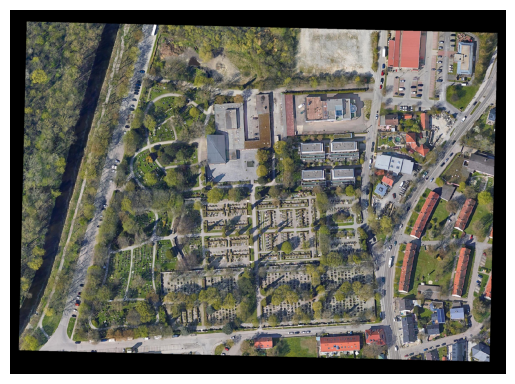

In [1]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

# Path to your RGB image
image_path = "C:/Users/leoni/Documents/Uni/UGS/Project/Classification_data/Imagery/goeggingen/goeggingen_cemetery.tif"

# Read and plot RGB raster
with rasterio.open(image_path) as src:
    # Read the three bands (assuming they are ordered as RGB in the file)
    r, g, b = src.read([1, 2, 3])
    
    # Stack the bands into an RGB image
    rgb = np.stack((r, g, b), axis=-1)
    
    # Normalize the bands to 0-1 range for visualization
    # You might not need this step if your image is already in an appropriate scale
    rgb_normalized = rgb / rgb.max()

plt.imshow(rgb_normalized)
plt.axis('off')  # Turn off axis labels
plt.show()

In [2]:
# Open the RGB image
with rasterio.open(image_path) as src:
    # Read the three bands of the image (assuming the first three are Red, Green, and Blue)
    r = src.read(1)  # Red band
    g = src.read(2)  # Green band
    b = src.read(3)  # Blue band
    
    # Replace no-data values with NaNs or another fill value of your choice
    # Assuming that no-data values are already defined in the image metadata
    no_data_value = src.nodata
    r[r == no_data_value] = 0  # Or use a specific fill value
    g[g == no_data_value] = 0
    b[b == no_data_value] = 0

    # Create a list of arrays representing the composite raster stack
    crst = [r, g, b]

# Now crst is a list containing the 3 arrays of your image bands
# You can print the array shapes to confirm
for band in crst:
    print(band.shape)

(1576, 2145)
(1576, 2145)
(1576, 2145)


In [3]:
crst

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)]

In [4]:
import os
import numpy as np
import rasterio
from rasterio.warp import reproject, Resampling

# Function to resample an array to match the target raster
def resample_to_raster(src_array, src_transform, src_crs, target_raster_path, resampling_method=Resampling.bilinear):
    with rasterio.open(target_raster_path) as target_raster:
        target_shape = target_raster.shape
        target_transform = target_raster.transform
        target_crs = target_raster.crs

        resampled_array = np.empty((src_array.shape[0], target_shape[0], target_shape[1]), dtype=src_array.dtype)
        for i in range(src_array.shape[0]):  # Iterate over each band
            reproject(
                source=src_array[i],
                destination=resampled_array[i],
                src_transform=src_transform,
                src_crs=src_crs,
                dst_transform=target_transform,
                dst_crs=target_crs,
                resampling=resampling_method
            )
        return resampled_array

# Paths to your RGB image, training, and validation tif
rgb_image_path = "C:/Users/leoni/Documents/Uni/UGS/Project/Classification_data/Imagery/goeggingen/goeggingen_cemetery.tif"
train_raster_path = "C:/Users/leoni/Documents/Uni/UGS/Project/Classification_data/Imagery/goeggingen/goeggingen_cem_grave_train.tif"
val_raster_path = "C:/Users/leoni/Documents/Uni/UGS/Project/Classification_data/Imagery/goeggingen/goeggingen_cem_grave_val.tif"

# Open the RGB image to get crs and transform
with rasterio.open(rgb_image_path) as src:
    src_crs = src.crs
    src_transform = src.transform
    # Read the three bands of the image (assuming the first three are Red, Green, and Blue)
    rgb_array = np.array([src.read(1), src.read(2), src.read(3)])

# Resample the RGB stack to the training and validation datasets
train_resampled = resample_to_raster(rgb_array, src_transform, src_crs, train_raster_path)
val_resampled = resample_to_raster(rgb_array, src_transform, src_crs, val_raster_path)

# Now train_resampled and val_resampled contain the resampled RGB bands
# You can print the array shapes to confirm
print(train_resampled.shape)
print(val_resampled.shape)

(3, 3818, 4563)
(3, 3818, 3501)


In [5]:
val_resampled

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [12]:
import os
import pandas as pd
import numpy as np
import rasterio

# Helper function to flatten and combine RGB bands and class raster into a dataframe
def rgb_rasters_to_dataframe(rgb_rasters, class_raster_path):
    # Read class raster
    with rasterio.open(class_raster_path) as class_raster:
        class_data = class_raster.read(1).flatten()  # Assuming class labels are in band 1
    
    # Flattening each band in the RGB raster
    data = {f'band_{i+1}': band.flatten() for i, band in enumerate(rgb_rasters)}
    
    # Adding class labels to the data dictionary
    data['class'] = class_data
    
    # Creating the dataframe
    df = pd.DataFrame(data)
    return df

# Paths to your training and validation class labels rasters
train_class_raster_path = "C:/Users/leoni/Documents/Uni/UGS/Project/Classification_data/Imagery/goeggingen/goeggingen_cem_grave_train.tif"
val_class_raster_path = "C:/Users/leoni/Documents/Uni/UGS/Project/Classification_data/Imagery/goeggingen/goeggingen_cem_grave_val.tif"

# Create dataframes for training and validation
train_df = rgb_rasters_to_dataframe(train_resampled, train_class_raster_path)
val_df = rgb_rasters_to_dataframe(val_resampled, val_class_raster_path)

# Combine training and validation dataframes
combined_df = pd.concat([train_df, val_df], ignore_index=True)

# Drop rows where class is 0 (assuming 0 is the no-data or background class) and rows with NaN values
combined_df.dropna(inplace=True)
combined_df = combined_df[combined_df['class'] != 255]
#combined_df = combined_df[combined_df['class'] != 0]

In [13]:
combined_df

,band_1,band_2,band_3,class
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
30788347,0,0,0,0
30788348,0,0,0,0
30788349,0,0,0,0
30788350,0,0,0,0


In [14]:
combined_df[combined_df['class'] == 1]
combined_df['class'].value_counts()

class
0    27836375
4     1493147
5      954182
1      260715
2      208284
3       35649
Name: count, dtype: int64

In [15]:
num_class_1 = combined_df[combined_df['class'] == 4].shape[0]

# Step 2: Randomly sample instances from class 0 to match the number in class 1
class_0_sampled = combined_df[combined_df['class'] == 0].sample(n=num_class_1, random_state=42)

# Step 3: Exclude original class 0 instances from the DataFrame
non_class_0 = combined_df[combined_df['class'] != 0]

# Step 4: Combine the sampled class 0 instances with all non-class 0 instances
balanced_df = pd.concat([class_0_sampled, non_class_0])

# Reset the index of the new balanced DataFrame
balanced_df.reset_index(drop=True, inplace=True)

In [18]:
combined_df = balanced_df
combined_df['class'].value_counts()

class
0    1493147
4    1493147
5     954182
1     260715
2     208284
3      35649
Name: count, dtype: int64

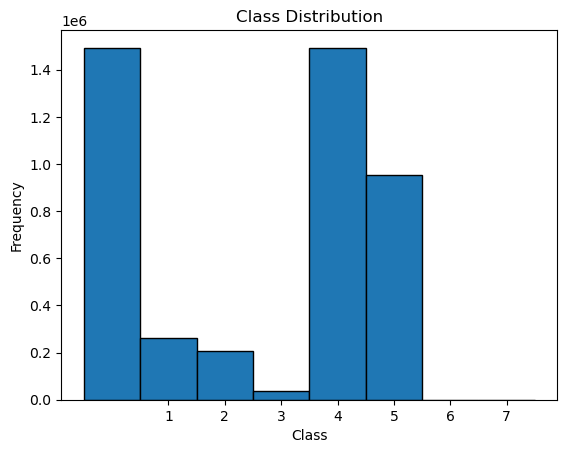

             band_1        band_2        band_3         class
count  4.445124e+06  4.445124e+06  4.445124e+06  4.445124e+06
mean   1.094693e+02  1.096618e+02  9.963709e+01  2.593342e+00
std    5.719120e+01  5.301860e+01  5.279129e+01  2.081777e+00
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
25%    6.600000e+01  7.200000e+01  6.000000e+01  0.000000e+00
50%    1.070000e+02  1.090000e+02  9.000000e+01  4.000000e+00
75%    1.590000e+02  1.530000e+02  1.450000e+02  4.000000e+00
max    2.550000e+02  2.550000e+02  2.550000e+02  5.000000e+00
band_1    uint8
band_2    uint8
band_3    uint8
class     uint8
dtype: object


In [19]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Assuming 'combined_df' is your DataFrame and it includes a 'class' column
# Plot a histogram of the 'class' column
plt.hist(combined_df['class'], bins=np.arange(0, 9) - 0.5, edgecolor='black')  # bins set explicitly for classes 1-7
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(np.arange(1, 8))  # set x-ticks to be at the center of bins for classes 1-7
plt.show()

# Convert the 'class' column to a numerical format starting from 0
combined_df['class'] = combined_df['class'] #- 1  # Subtract 1 to make classes start from 0

# Describe the DataFrame to check for Inf, NaNs, or other odd patterns
description = combined_df.describe(include='all')  # include='all' to get statistics for all columns
print(description)

# Print out the schema of the DataFrame
print(combined_df.dtypes)

In [20]:
from tqdm import tqdm
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, cohen_kappa_score, make_scorer
from xgboost import XGBClassifier
import numpy as np
import pandas as pd

# Create a new class mapping because class '3' is missing after reindexing (original class '4')
unique_classes = combined_df['class'].unique()
class_mapping = {old_class: new_class for new_class, old_class in enumerate(sorted(unique_classes))}

# Apply the mapping to your target variable
combined_df['class_mapped'] = combined_df['class'].map(class_mapping)

# Now 'class_mapped' will have consecutive class labels starting from 0
y = combined_df['class_mapped'].values
#X = combined_df.drop(columns=['class', 'class_mapped']).values
X = combined_df[['band_1', 'band_2', 'band_3']].values

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(
    n_estimators=100,  # Default is 100, consider reducing if runtime is too long
    max_depth=10,  # Default is 6, consider reducing if runtime is too long
    learning_rate=0.6,  # Default is 0.3, tuning might be required
    random_state=123,
    n_jobs=-1  # Use all available CPU cores
)

# Define the cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=12, shuffle=True, random_state=123)

# Prepare lists to store the scores
balanced_accuracy_scores = []
kappa_scores = []

# Manually iterate through the splits and train the model
for train_index, test_index in tqdm(cv_strategy.split(X, y), total=cv_strategy.get_n_splits(), desc="Cross-validating"):
    # Split the data
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    xgb_classifier.fit(X_train, y_train)
    
    # Predict and calculate scores for this fold
    y_pred = xgb_classifier.predict(X_test)
    
    # Store the scores
    balanced_accuracy_scores.append(balanced_accuracy_score(y_test, y_pred))
    kappa_scores.append(cohen_kappa_score(y_test, y_pred))

# Print the average of the scores
print(f"Balanced Accuracy: {np.mean(balanced_accuracy_scores)}")
print(f"Cohen's Kappa: {np.mean(kappa_scores)}")

Cross-validating: 100%|██████████| 12/12 [12:45<00:00, 63.75s/it]

Balanced Accuracy: 0.4256814610671756
Cohen's Kappa: 0.304083057033409


In [37]:
from tqdm.auto import tqdm
import xgboost as xgb

# Custom callback to use with XGBoost training
class XGBProgressCallback(xgb.callback.TrainingCallback):
    def __init__(self, rounds):
        self.pbar = tqdm(total=rounds)

    def after_iteration(self, model, epoch, evals_log):
        self.pbar.update(1)
        return False  # Return False to continue training

    def after_training(self, model):
        self.pbar.close()
        return model

# Convert data to DMatrix format (required for XGBoost's native interface)
dtrain = xgb.DMatrix(X, label=y)

num_classes = np.unique(y).size

params = {
    'objective': 'multi:softmax',
    'eval_metric': 'mlogloss',  # Use 'mlogloss' for multi-class problems
    'num_class': num_classes,  # Set the number of classes here
    # ... include any other parameters you wish to set
}

# Proceed with the training
bst = xgb.train(params, dtrain, num_boost_round=100, callbacks=[XGBProgressCallback(100)])

  0%|          | 0/100 [00:00<?, ?it/s]

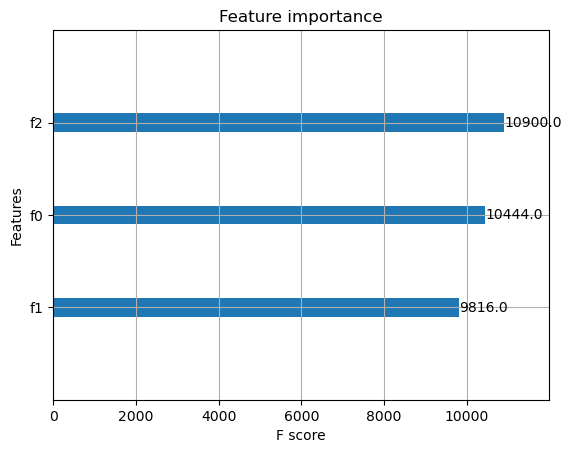

In [39]:

xgb.plot_importance(bst)
plt.show()

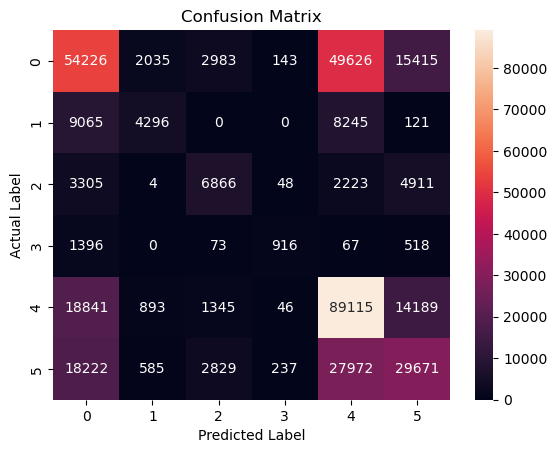

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the labels of the test set
y_pred = bst.predict(xgb.DMatrix(X_test))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [36]:
# import matplotlib.pyplot as plt
# import numpy as np
# from xgboost import XGBClassifier
# from sklearn.model_selection import learning_curve

# # Define the range of training sizes you want to plot
# train_sizes = np.linspace(0.1, 1.0, 2.5)  # You can adjust the range as needed

# # Calculate learning curve scores using learning_curve function
# train_sizes, train_scores, validation_scores = learning_curve(
#     xgb_classifier, X, y, train_sizes=train_sizes, cv=6,
#     scoring='accuracy', shuffle=True, random_state=123, n_jobs=-1
# )

# # Calculate the mean and standard deviation of the scores for each training size
# train_mean = np.mean(train_scores, axis=1)
# train_std = np.std(train_scores, axis=1)
# validation_mean = np.mean(validation_scores, axis=1)
# validation_std = np.std(validation_scores, axis=1)

# # Create the learning curve plot
# plt.figure(figsize=(10, 6))
# plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
# plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.1, color="orange")
# plt.plot(train_sizes, train_mean, marker='o', color="blue", label="Training Accuracy")
# plt.plot(train_sizes, validation_mean, marker='o', color="orange", label="Validation Accuracy")

# # Customize the plot
# plt.title("Learning Curve")
# plt.xlabel("Training Size")
# plt.ylabel("Accuracy")
# plt.legend(loc="best")
# plt.grid()
# plt.tight_layout()
# plt.show()

In [21]:
# Check the shapes of all rasters in crst
raster_shapes = [raster.shape for raster in crst]
if not all(shape == raster_shapes[0] for shape in raster_shapes):
    print("Not all rasters have the same shape:", raster_shapes)
else:
    print("All rasters have the same shape:", raster_shapes[0])

# Create a DataFrame from the rasters regardless of their shape
# This part assumes that crst is defined and contains your raster data
dfn = pd.DataFrame({f'band_{i+1}': raster.flatten() for i, raster in enumerate(crst)})

All rasters have the same shape: (1576, 2145)


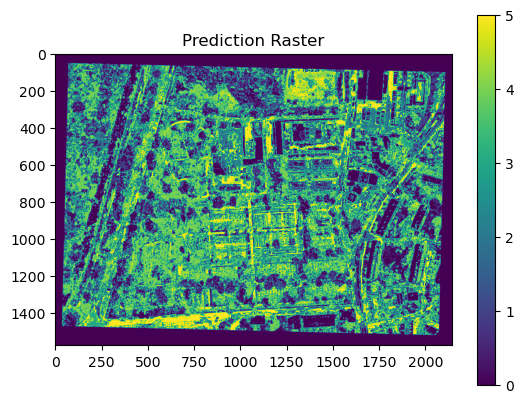

In [22]:
# Replace any non-finite values (like Inf) with 0
dfn.replace([np.inf, -np.inf], 0, inplace=True)

# Train the model
xgb_classifier.fit(X, y)  # X and y should be your training data and labels

# Now you can make predictions
pred = xgb_classifier.predict(dfn)

nodata_value = -9999  # You can choose any valid int32 value as the nodata value

# Assuming 'srs' is one of the original rasters and has the same spatial dimensions as 'crst'
with rasterio.open(image_path) as src:  # Assuming b8 is a path to one of your rasters
    profile = src.profile
    profile.update(dtype=rasterio.int32, count=1, nodata=nodata_value)

    # Reshape the prediction array to match the spatial dimensions and write to a new raster file
    pred_reshaped = pred.reshape(src.shape).astype(np.int32)
    with rasterio.open('prediction.tif', 'w', **profile) as dst:
        dst.write(pred_reshaped, 1)

plt.imshow(pred_reshaped, cmap='viridis')  # Change colormap as needed
plt.colorbar()
plt.title('Prediction Raster')
plt.show()

0 no data
1 0 recreation ground
2 1 grass
3 2 cemetery
4 bench
5 3 playground
6 4 park
7 5 grave
8 6 path

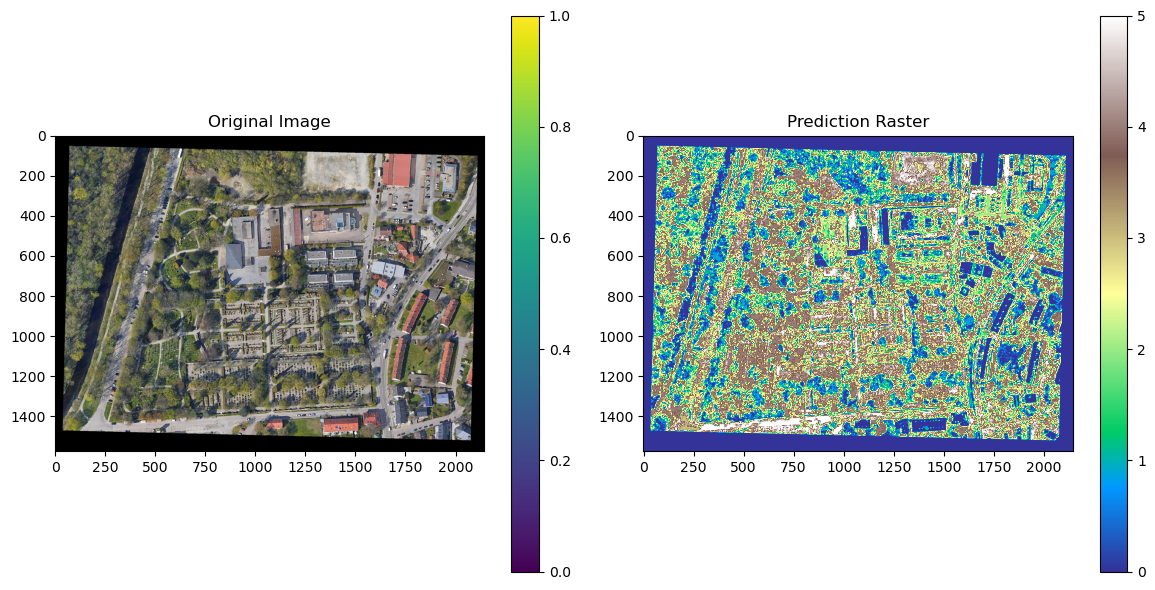

In [23]:
with rasterio.open(image_path) as src:  # 'image_path' should be the path to your original raster
    profile = src.profile
    profile.update(dtype=rasterio.int32, count=1, nodata=nodata_value)

    pred_reshaped = pred.reshape(src.shape).astype(np.int32)
    with rasterio.open('prediction.tif', 'w', **profile) as dst:
        dst.write(pred_reshaped, 1)

# Read and plot RGB raster
with rasterio.open("C:/Users/leoni/Documents/Uni/UGS/Project/Classification_data/Imagery/goeggingen/goeggingen_cemetery.tif") as src:
    # Read the three bands (assuming they are ordered as RGB in the file)
    r, g, b = src.read([1, 2, 3])
    rgb = np.stack((r, g, b), axis=-1)
    original_image = rgb / rgb.max()

plt.figure(figsize=(12, 6))

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(original_image)  # Use gray colormap for the original image
plt.colorbar()
plt.title('Original Image')

# Plot the prediction raster
plt.subplot(1, 2, 2)
plt.imshow(pred_reshaped, cmap='terrain')  # Use a colormap that provides distinct colors for different classes
plt.colorbar()
plt.title('Prediction Raster')

plt.tight_layout()
plt.show()

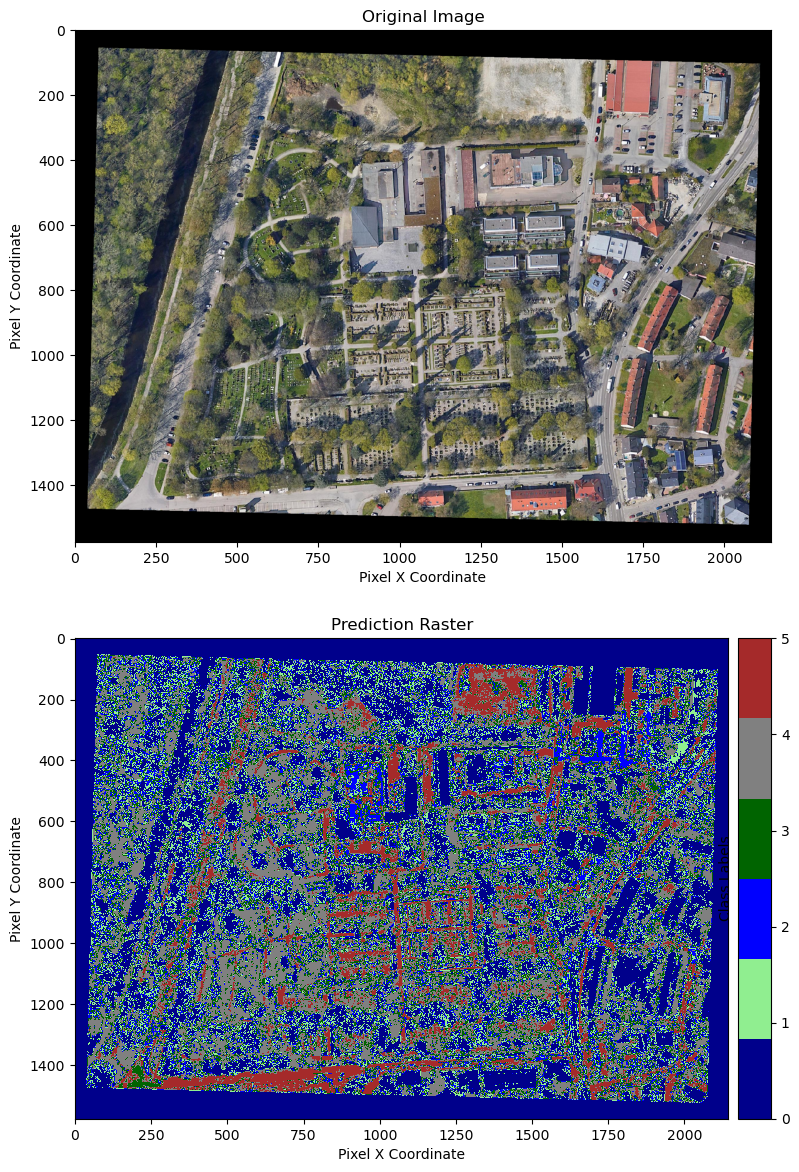

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap

# Define custom colors for each class
class_colors = ['darkblue', 'lightgreen', 'blue', 'darkgreen', 'grey', 'brown']  # 0, grass, funeral_hall, park, grave, footway
# class_colors = ['lightgreen', 'blue', 'red', 'purple']  # grass, funeral_hall, cemetery, other

# Create a custom colormap using the ListedColormap
custom_cmap = ListedColormap(class_colors)

# Define the size of the figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 12))

# Plot the original RGB image
ax1.imshow(original_image)
ax1.set_title('Original Image')
ax1.set_xlabel('Pixel X Coordinate')
ax1.set_ylabel('Pixel Y Coordinate')

# Plot the prediction raster with the custom colormap
prediction_plot = ax2.imshow(pred_reshaped, cmap=custom_cmap)
ax2.set_title('Prediction Raster')
ax2.set_xlabel('Pixel X Coordinate')
ax2.set_ylabel('Pixel Y Coordinate')

# Create a divider to position the colorbar for the prediction raster
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Add a colorbar for the prediction raster with class labels
colorbar = plt.colorbar(prediction_plot, cax=cax, ticks=range(len(class_colors)))
colorbar.set_label('Class Labels')
colorbar.set_ticklabels([str(i) for i in range(len(class_colors))])
cax.yaxis.set_label_position('left')  # Position colorbar labels to the left

plt.tight_layout()
plt.show()

In [25]:
# Step 1: Identify the Brown Class Index
brown_class_index = class_colors.index('brown')  # This should be 4

# Step 2: Count Brown Pixels
brown_pixels_count = np.sum(pred_reshaped == brown_class_index)

# Step 3: Calculate Total Pixels
total_pixels = pred_reshaped.size

# Step 4: Calculate Percentage
brown_percentage = (brown_pixels_count / total_pixels) * 100

print(f"Percentage of Brown Class in the Image: {brown_percentage:.2f}%")

Percentage of Brown Class in the Image: 12.44%


In [26]:
# Step 1: Identify the Brown Class Index
brown_class_index = class_colors.index('lightgreen')  # This should be 4

# Step 2: Count Brown Pixels
brown_pixels_count = np.sum(pred_reshaped == brown_class_index)

# Step 3: Calculate Total Pixels
total_pixels = pred_reshaped.size

# Step 4: Calculate Percentage
brown_percentage = (brown_pixels_count / total_pixels) * 100

print(f"Percentage of Green Class in the Image: {brown_percentage:.2f}%")

Percentage of Green Class in the Image: 2.02%


In [27]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

def plot_zoomable_image(image, center_x, center_y, zoom, title='Image', cmap=None):
    # Check if the image is 2D or 3D and adjust accordingly
    if image.ndim == 3:
        height, width, _ = image.shape
    elif image.ndim == 2:
        height, width = image.shape
    else:
        raise ValueError("Image must be either 2D or 3D.")

    zoomed_width = int(width / zoom)
    zoomed_height = int(height / zoom)
    
    # Calculate the boundaries of the zoomed image
    x_min = max(center_x - zoomed_width // 2, 0)
    x_max = min(x_min + zoomed_width, width)
    y_min = max(center_y - zoomed_height // 2, 0)
    y_max = min(y_min + zoomed_height, height)
    
    # Adjust the minimums if the selected area exceeds the image boundaries
    if x_max == width:
        x_min = x_max - zoomed_width
    if y_max == height:
        y_min = y_max - zoomed_height

    # Plot
    plt.figure(figsize=(18, 9))
    if image.ndim == 3:
        plt.imshow(image[y_min:y_max, x_min:x_max], cmap=cmap)
    elif image.ndim == 2:
        plt.imshow(image[y_min:y_max, x_min:x_max], cmap='tab10', aspect='auto')
    plt.title(title)
    plt.colorbar()
    plt.show()

# Load your original and prediction images here
# For the original image
with rasterio.open("C:/Users/leoni/Documents/Uni/UGS/Project/Classification_data/Imagery/goeggingen/goeggingen_cemetery.tif") as src:
    r, g, b = src.read([1, 2, 3])
    original_image = np.stack((r, g, b), axis=-1) / 255.0  # Normalizing

# Assuming 'pred_reshaped' is already defined as your prediction raster
# pred_reshaped = ...

# Define widgets
center_x = widgets.IntSlider(min=0, max=original_image.shape[1], step=100, value=original_image.shape[1] // 2, description='Center X:')
center_y = widgets.IntSlider(min=0, max=original_image.shape[0], step=100, value=original_image.shape[0] // 2, description='Center Y:')
zoom = widgets.FloatSlider(min=1, max=10, value=1, step=0.1, description='Zoom:')

# Interactive function to update plots
def update_plots(center_x, center_y, zoom):
    plot_zoomable_image(original_image, center_x, center_y, zoom, title='Original Image')
    plot_zoomable_image(pred_reshaped, center_x, center_y, zoom, title='Prediction Raster', cmap='terrain')

# Display widgets and link to the update function
interactive_plot = widgets.interactive(update_plots, center_x=center_x, center_y=center_y, zoom=zoom)
display(interactive_plot)

interactive(children=(IntSlider(value=1072, description='Center X:', max=2145, step=100), IntSlider(value=788,…

[12:25:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[12:25:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


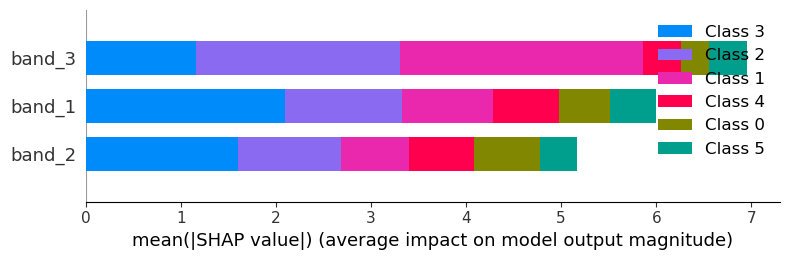

In [28]:
import shap

# Initialize the SHAP explainer
explainer = shap.Explainer(xgb_classifier)

# Calculate SHAP values for a sample of your data (e.g., X_train or X_test)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=combined_df.drop(columns=['class', 'class_mapped']).columns, plot_type='bar', show=False)

# Show the plot
plt.show()

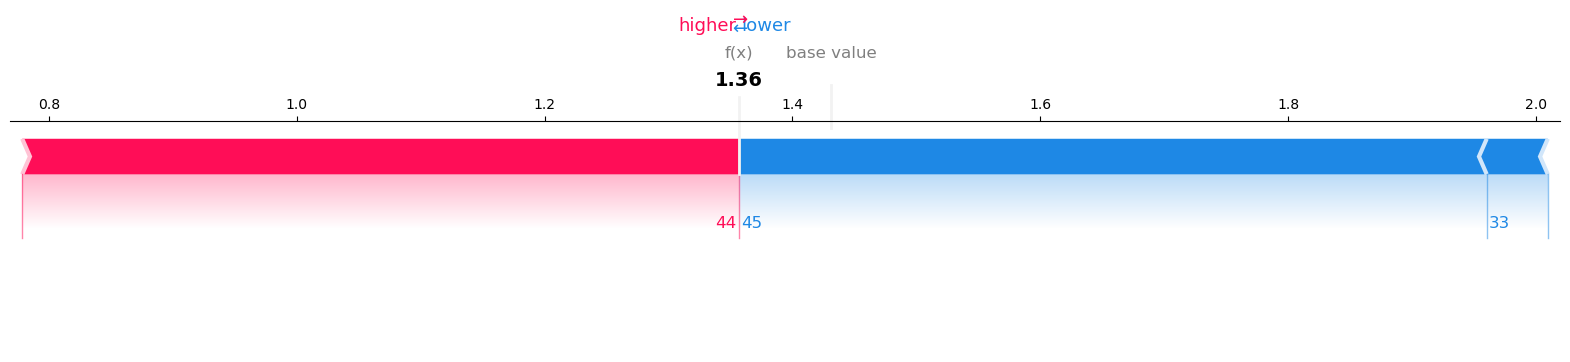

In [29]:
import shap

# Initialize the SHAP explainer with your trained XGBoost model
#explainer = shap.TreeExplainer(xgb_classifier)

# Compute SHAP values for a subset of your test data
# Assuming X_test is your test set
#shap_values = explainer.shap_values(X_test)  # Adjust the slice as needed

# Select SHAP values for the first class (index 0)
class_index = 0
shap.force_plot(explainer.expected_value[class_index], shap_values[class_index][0], X_test[0], matplotlib=True)

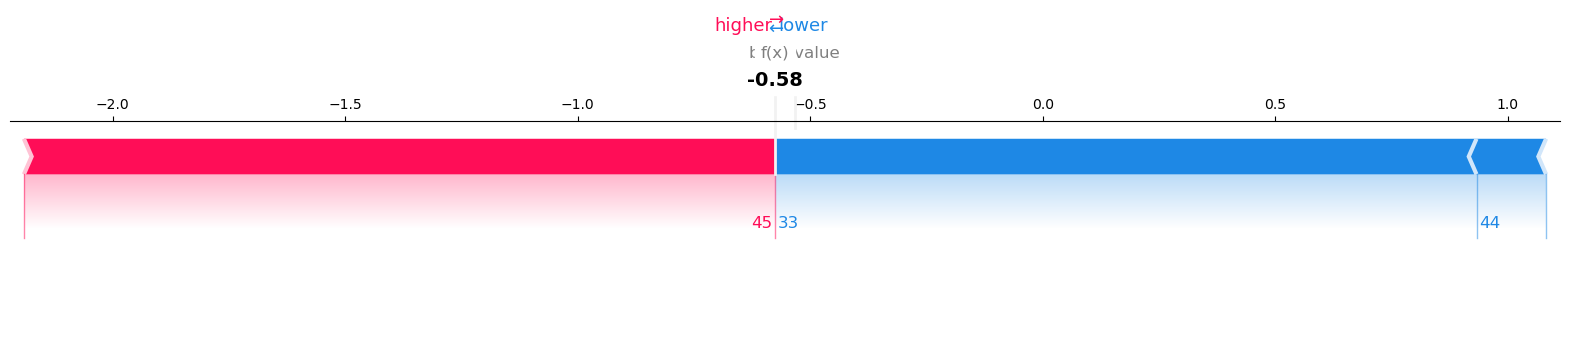

In [30]:
class_index = 1
shap.force_plot(explainer.expected_value[class_index], shap_values[class_index][0], X_test[0], matplotlib=True)

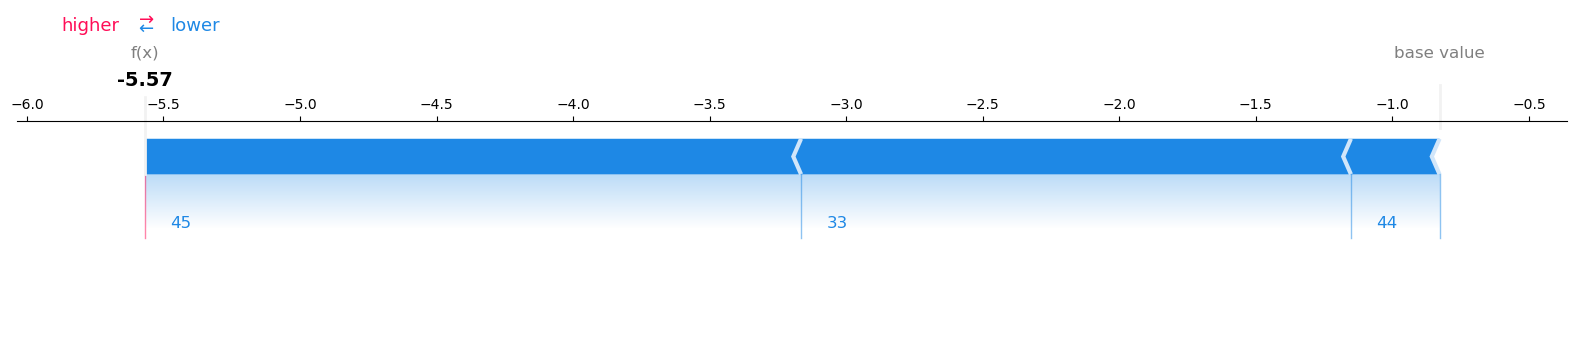

In [31]:
class_index = 2
shap.force_plot(explainer.expected_value[class_index], shap_values[class_index][0], X_test[0], matplotlib=True)

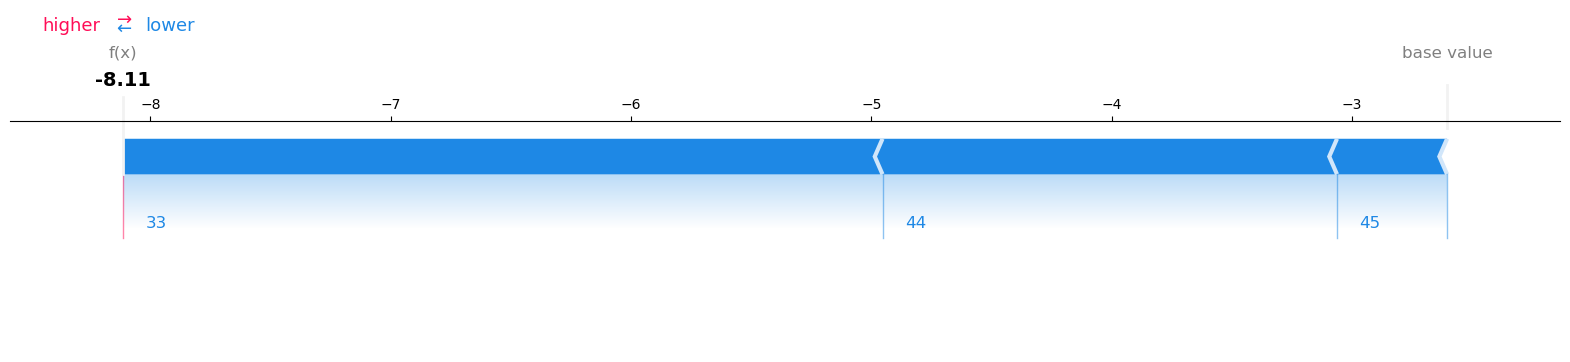

In [32]:
class_index = 3
shap.force_plot(explainer.expected_value[class_index], shap_values[class_index][0], X_test[0], matplotlib=True)

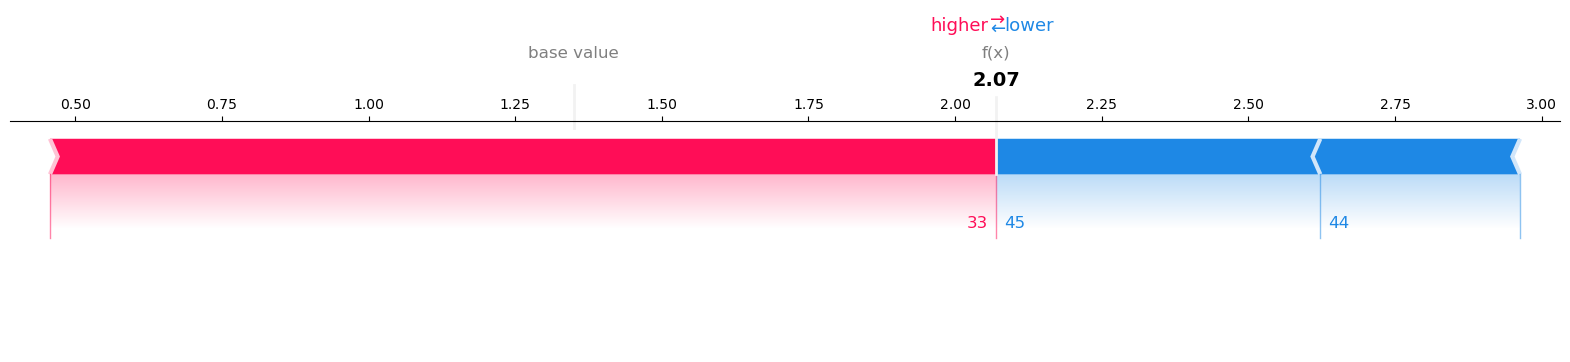

In [33]:
class_index = 4
shap.force_plot(explainer.expected_value[class_index], shap_values[class_index][0], X_test[0], matplotlib=True)

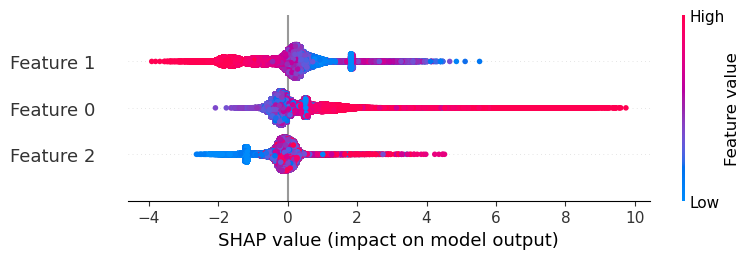

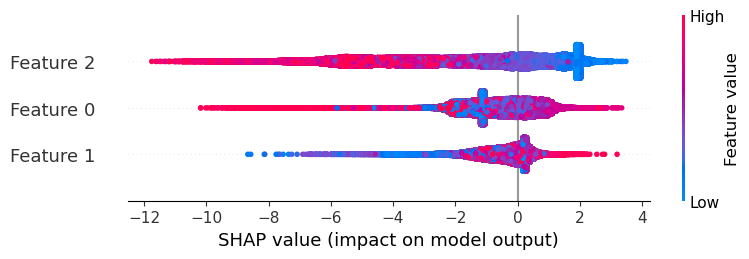

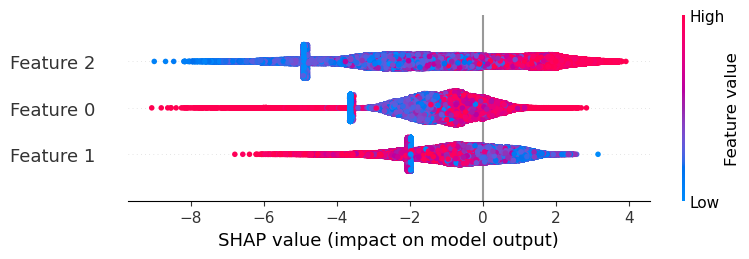

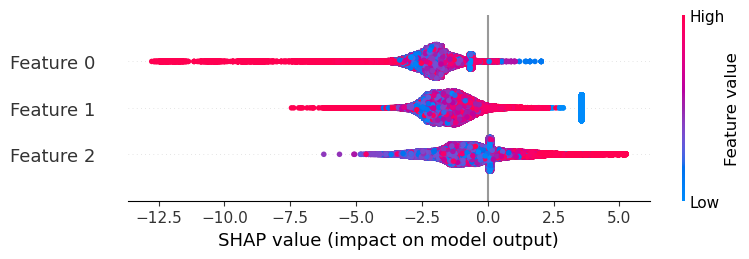

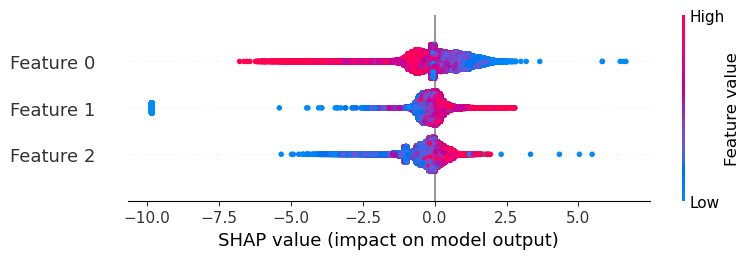

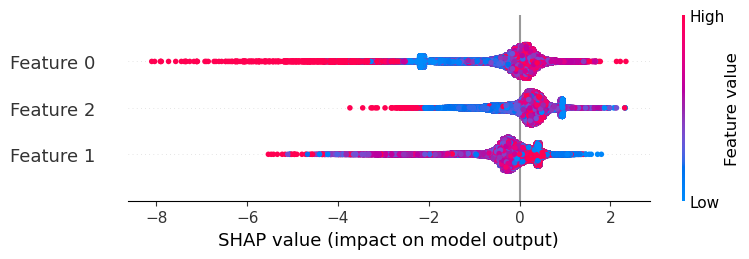

In [35]:
class_names = ["Class 0", "Class 1", "Class 2", "Class 3", "Class 4", "Class 5"]  # Example for three classes

# Plotting beeswarm plot for each class
for i in range(len(shap_values)):
    shap.summary_plot(shap_values[i], X_test, plot_type="dot", title=f"SHAP Summary Plot - {class_names[i]}")

The learning curve in the image you uploaded provides insight into the performance of your XGBoost classifier model as the size of the training dataset increases.

Here's how to interpret the accuracy from the learning curve:

Training Accuracy: This is the accuracy obtained by the model on the training dataset. The blue line represents the mean training accuracy across cross-validation folds for different sizes of the training data. The shaded area around the blue line indicates the standard deviation of the training accuracy, showing how much variance there is in the training accuracy for different cross-validation folds.

Validation Accuracy: The orange line represents the mean validation accuracy across cross-validation folds as the training size increases. Similarly, the shaded area around the orange line indicates the standard deviation of the validation accuracy, showing the variance in the model's performance on the validation set across different folds.

From the graph, we can observe the following:

The training accuracy starts high and remains relatively flat as the training size increases. This indicates that the model is performing consistently well on the training data, regardless of the size of the training dataset.

The validation accuracy is lower than the training accuracy and does not improve with more data. This can suggest that the model might not be generalizing well from the training data to unseen data. The consistent gap between the training and validation accuracy could also indicate a high variance in the model, which is a sign of overfitting.

The relatively small shaded areas indicate that the variance of the accuracy scores across the cross-validation folds is not large, meaning the model's performance is relatively stable across different subsets of the data.

Since the validation accuracy is not converging towards the training accuracy and there's a persistent gap, it could be beneficial to explore methods to reduce overfitting. This could include techniques like adding regularization, reducing the complexity of the model, or gathering more diverse training data.

From the previous code snippet where balanced accuracy and Cohen's Kappa scores are calculated, it appears that the model's balanced accuracy is around 0.488 and Cohen's Kappa is around 0.414. These scores are relatively low, indicating that the model's performance is not very good when considering the class imbalance (as balanced accuracy takes this into account) and the agreement between predicted and actual classifications (as Cohen's Kappa measures).

In summary, while the model shows high accuracy on the training data, its performance on the validation data is not improving with more data, suggesting it may not generalize well to new, unseen data. Further model tuning and strategies to combat overfitting are recommended.